In [1]:
import warnings
import ast
from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

warnings.filterwarnings("ignore")

In [2]:
PROJECT_NAME = "camel"
EXP_ID = "apch"
MODEL_HISTORY = 15
TOTAL_WINDOWS = 103
ALPHA = 0.05

DATA_DIR = Path().cwd() / "ecoselekt" / "data"
MODELS_DIR = Path().cwd() / "ecoselekt" / "models"
RESULTS_DIR = Path().cwd() / "results" / f"exp_{EXP_ID}"
FIGURES_DIR = Path().cwd() / "figures"

DATA_DIR.mkdir(parents=True, exist_ok=True)
MODELS_DIR.mkdir(parents=True, exist_ok=True)
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

In [3]:
# load baseline evaluation results
base_eval_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_base_eval.csv")
base_eval_df["model"] = "base"
base_eval_df.head()

project  window  test_split  precision    recall        f1       auc  \
0   camel       0           1   0.416667  0.178571  0.250000  0.811047   
1   camel       0           2   0.500000  0.179487  0.264151  0.803790   
2   camel       0           3   0.636364  0.205882  0.311111  0.739812   
3   camel       0           4   0.631579  0.193548  0.296296  0.722768   
4   camel       0           5   0.764706  0.302326  0.433333  0.841579   

      gmean        ap   specifi model  
0  0.413889  0.388012  0.959302  base  
1  0.414347  0.488475  0.956522  base  
2  0.448242  0.440658  0.975904  base  
3  0.428638  0.518080  0.949275  base  
4  0.542792  0.662527  0.974522  base

In [4]:
# load ecoselekt evaluation results
selekt_eval_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_selekt_eval.csv")
selekt_eval_df["model"] = "ecoselekt"
selekt_eval_df.head()

project  window  test_split  precision    recall        f1       auc  \
0   camel      15          16   0.722222  0.185714  0.295455  0.772143   
1   camel      15          17   0.933333  0.225806  0.363636  0.786758   
2   camel      15          18   0.625000  0.243902  0.350877  0.743366   
3   camel      15          19   0.774194  0.461538  0.578313  0.858173   
4   camel      15          20   0.692308  0.230769  0.346154  0.790014   

      gmean        ap   specifi      model  
0  0.422577  0.640487  0.961538  ecoselekt  
1  0.473466  0.705108  0.992754  ecoselekt  
2  0.484457  0.532496  0.962264  ecoselekt  
3  0.663106  0.680395  0.952703  ecoselekt  
4  0.474379  0.527907  0.975155  ecoselekt

In [5]:
# load best select evaluation results
best_eval_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_best_eval.csv")
best_eval_df["model"] = "best"
best_eval_df.head()

project  window  test_split  precision    recall        f1       auc  \
0   camel      15          16   0.884615  0.328571  0.479167  0.896484   
1   camel      15          17   1.000000  0.322581  0.487805  0.897616   
2   camel      15          18   0.875000  0.341463  0.491228  0.873754   
3   camel      15          19   0.935484  0.557692  0.698795  0.938085   
4   camel      15          20   0.833333  0.256410  0.392157  0.908186   

      gmean        ap   specifi model  
0  0.566559  0.823547  0.976923  best  
1  0.567962  0.849433  1.000000  best  
2  0.580662  0.715197  0.987421  best  
3  0.741725  0.873657  0.986486  best  
4  0.503215  0.761966  0.987578  best

(7832, 11)


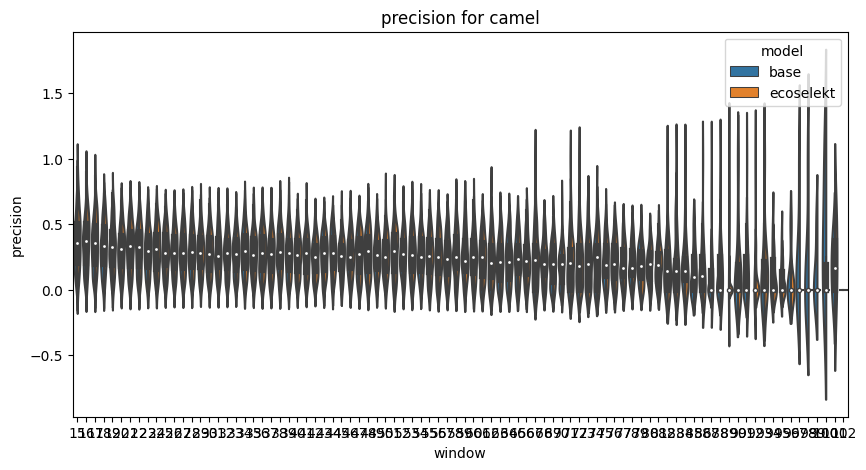

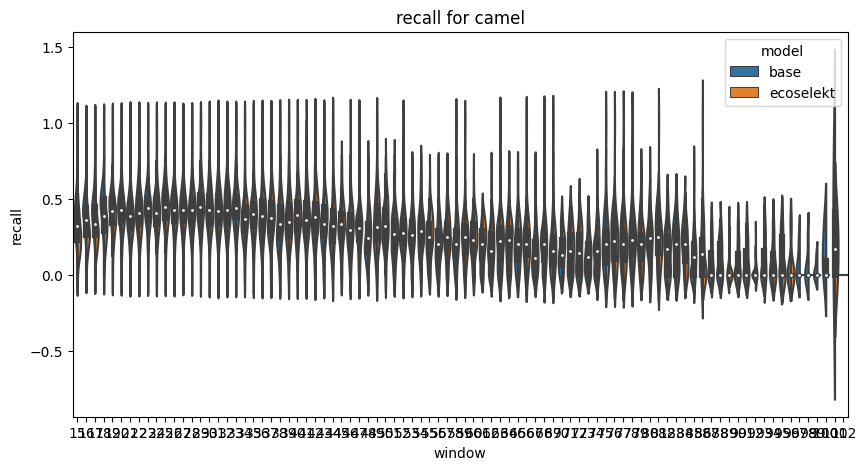

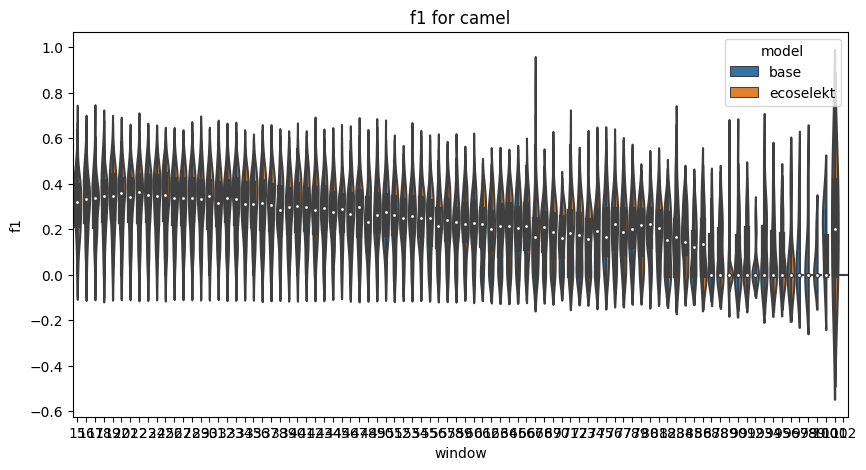

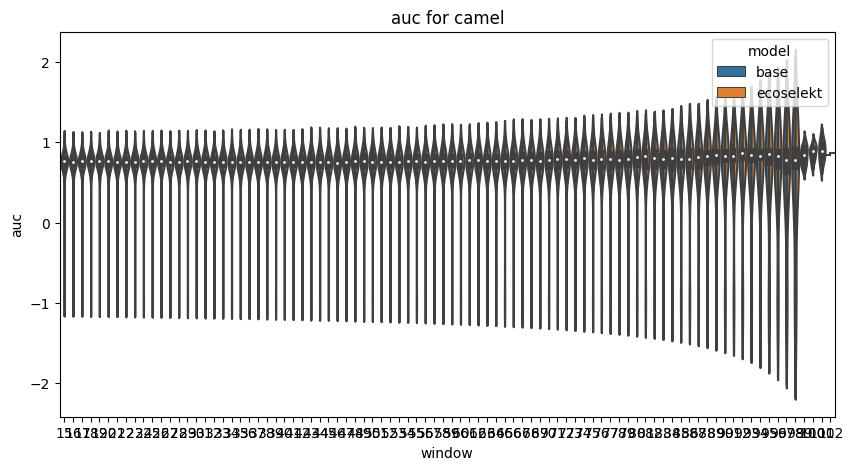

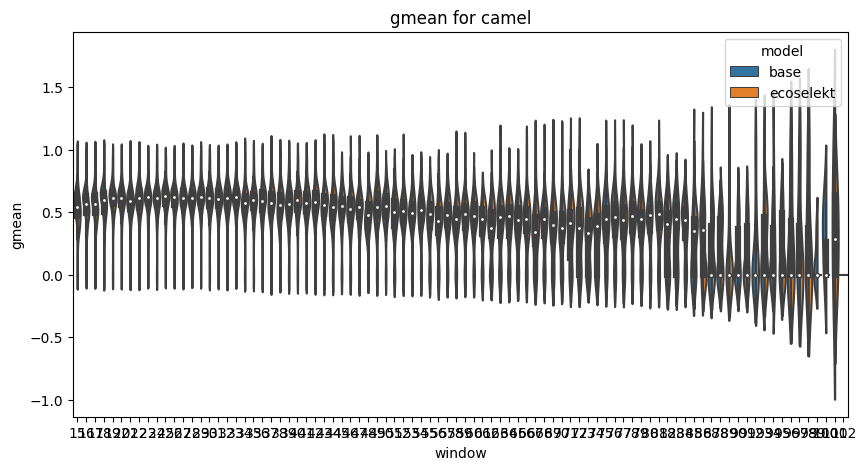

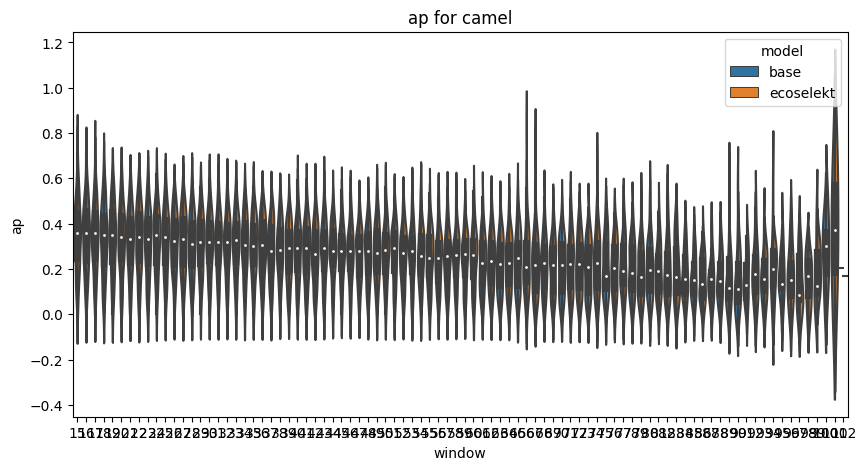

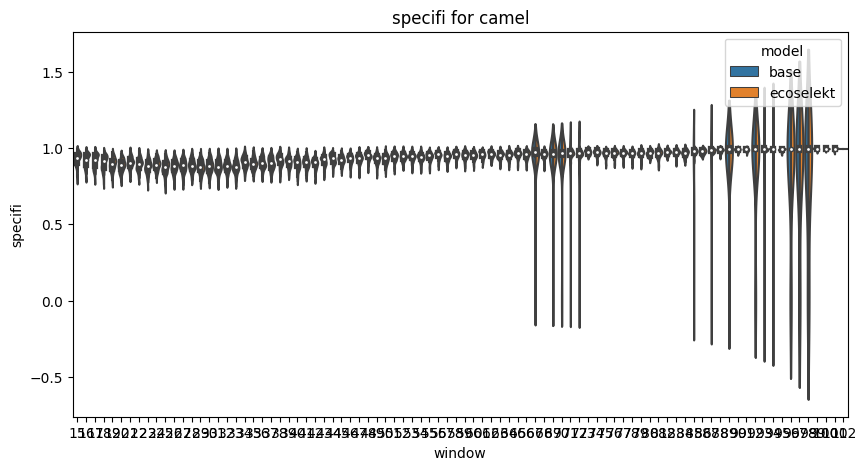

In [6]:
# concat base and ecoselekt evaluation dataframes keeping only common `window` and `test_split` then plot violin plots for each metric
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], selekt_eval_df])
print(eval_df.shape)

# plot violin plots for each metric
for metric in ["precision", "recall", "f1", "auc", "gmean", "ap", "specifi"]:
    plt.figure(figsize=(10, 5))
    sns.violinplot(x="window", y=metric, data=eval_df, hue="model", split=True)
    plt.title(f"{metric} for {PROJECT_NAME}")
    plt.show()


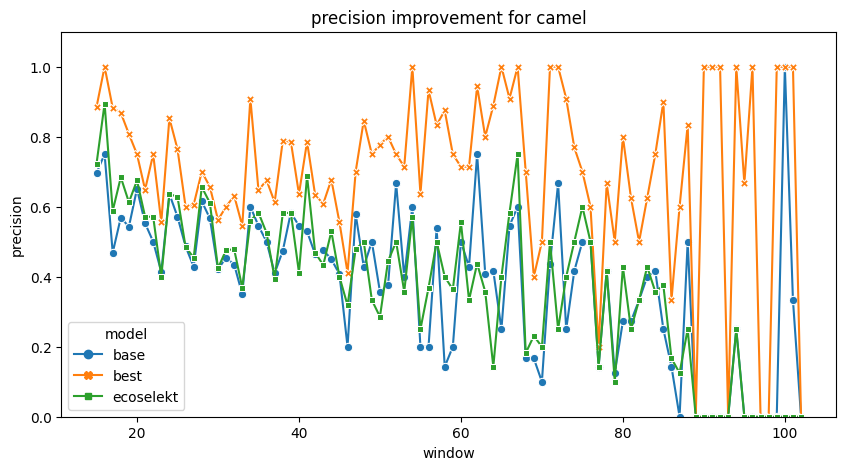

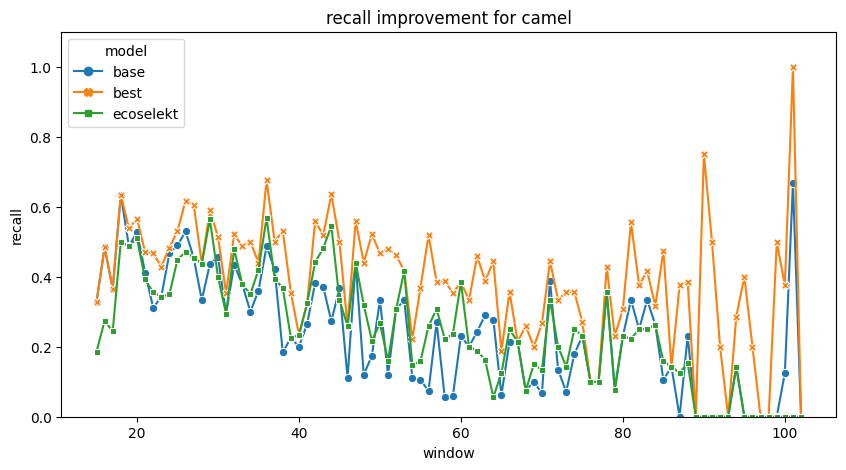

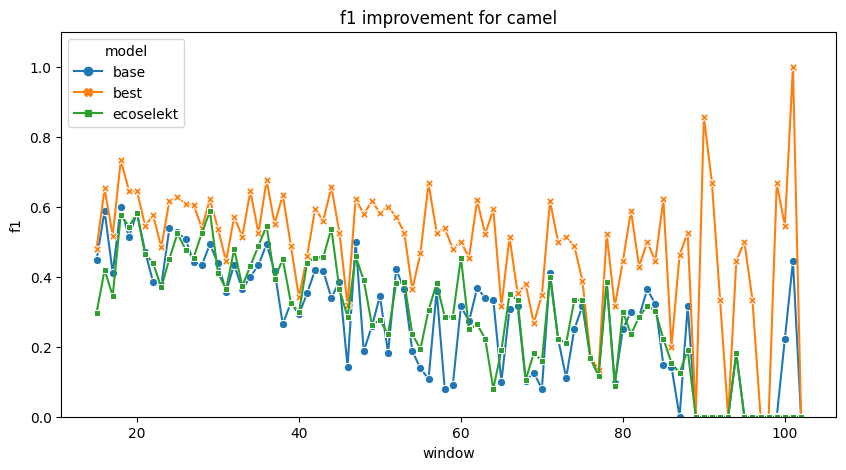

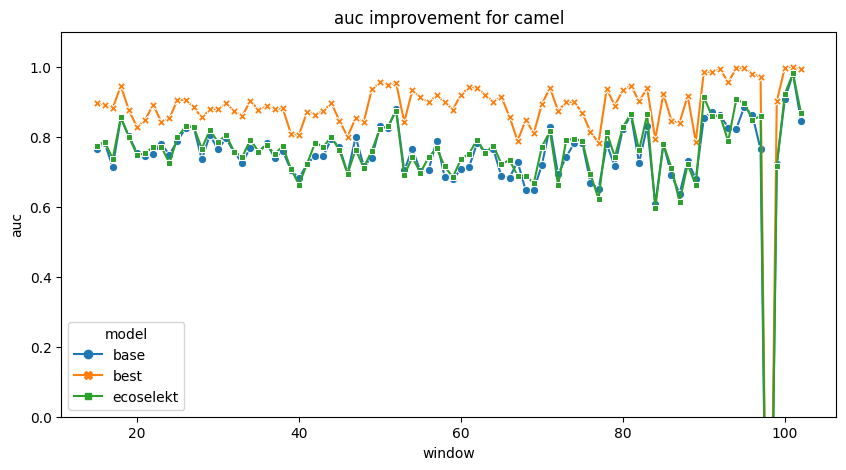

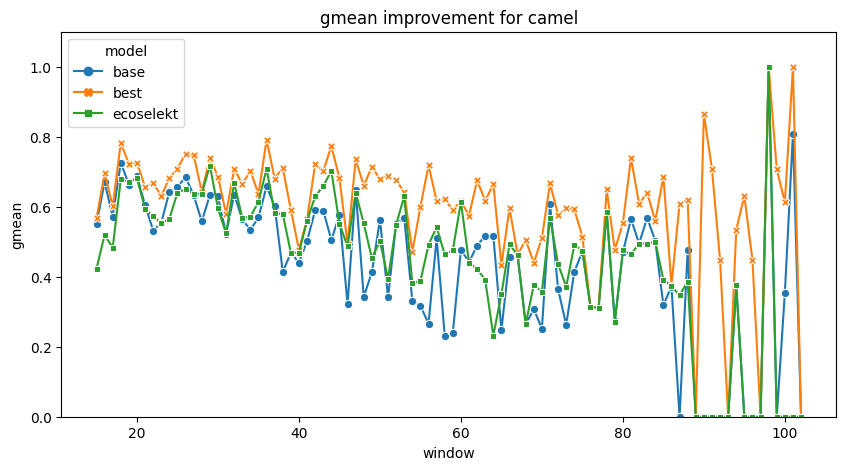

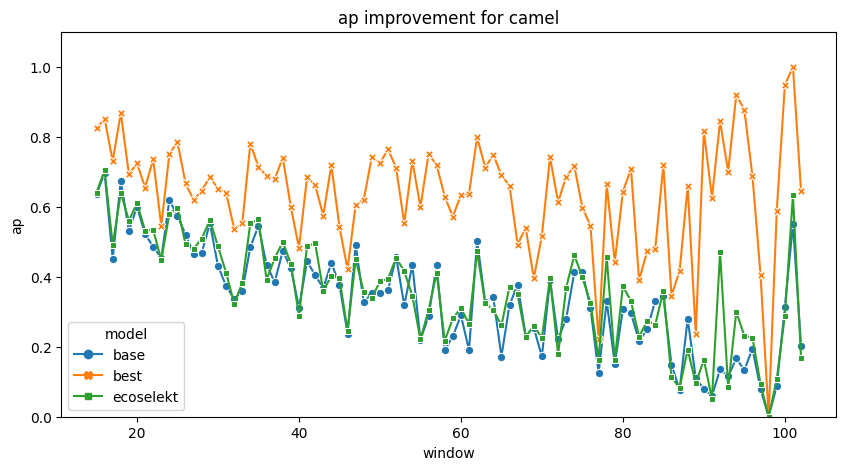

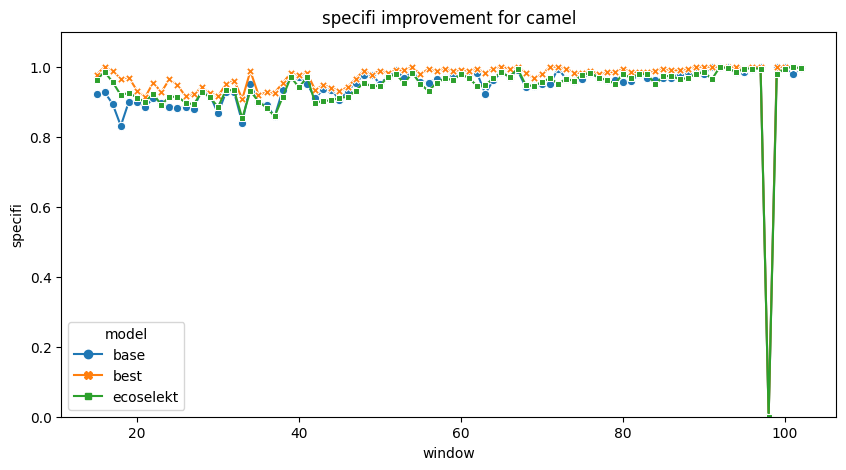

In [7]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], best_eval_df, selekt_eval_df])
eval_df = eval_df[eval_df["window"] == eval_df["test_split"] - 1]
# plot percetange improvement for each metric for each window
for metric in ["precision", "recall", "f1", "auc", "gmean", "ap", "specifi"]:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x="window", y=metric, data=eval_df, hue="model", markers=True, style="model", dashes=False)
    plt.title(f"{metric} improvement for {PROJECT_NAME}")
    plt.ylim(0, 1.1)
    plt.show()

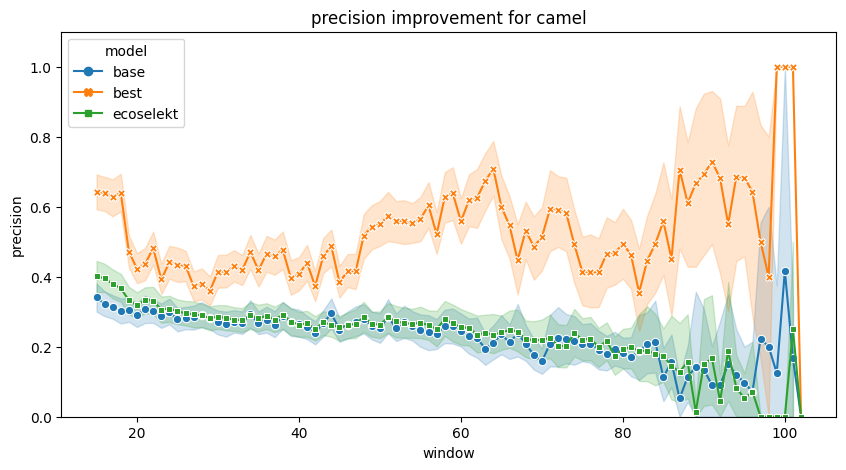

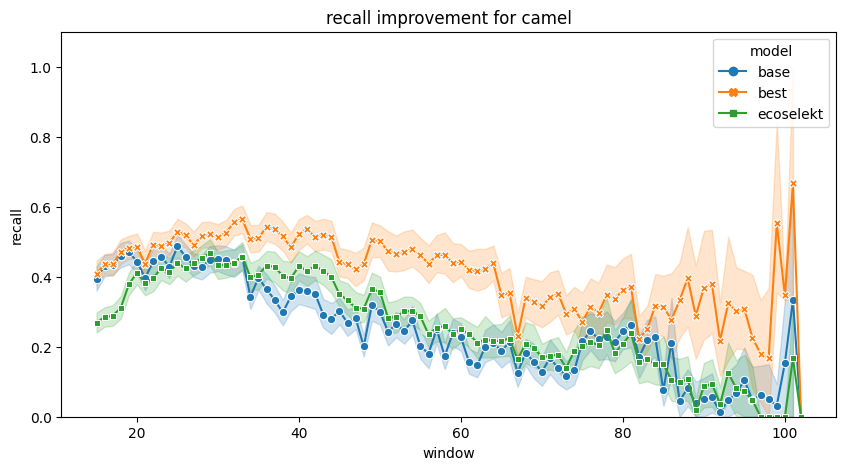

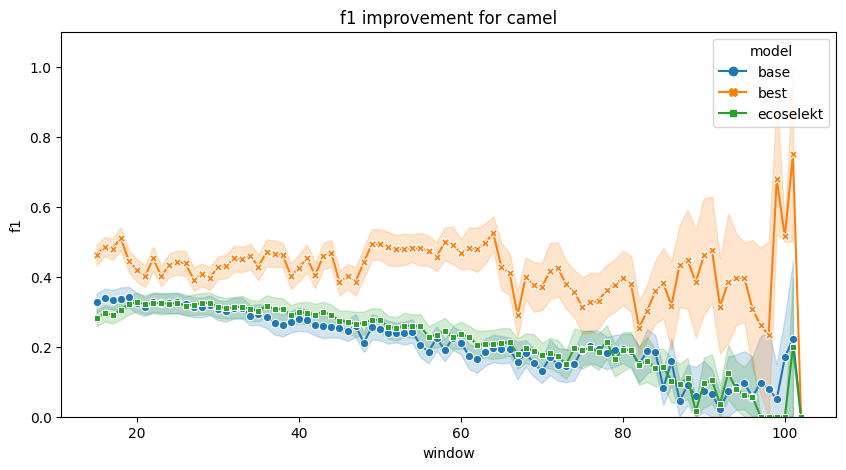

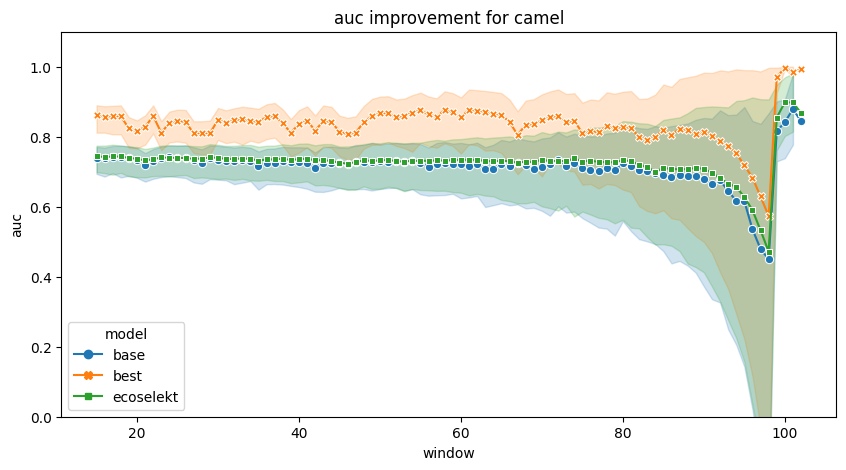

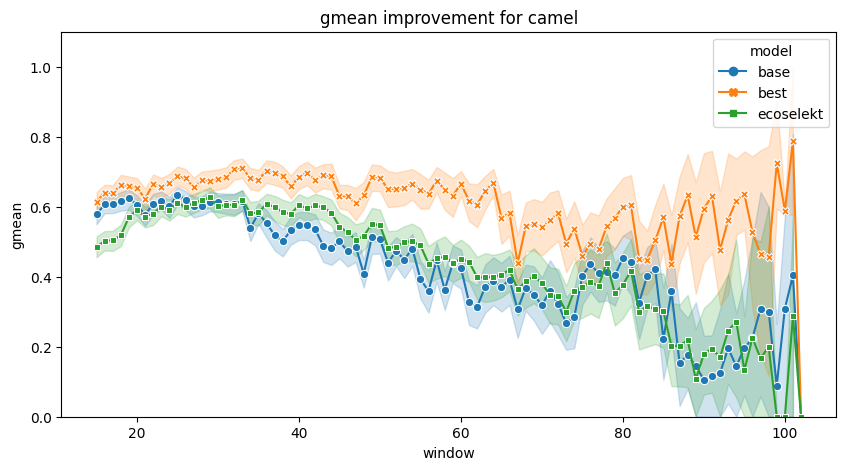

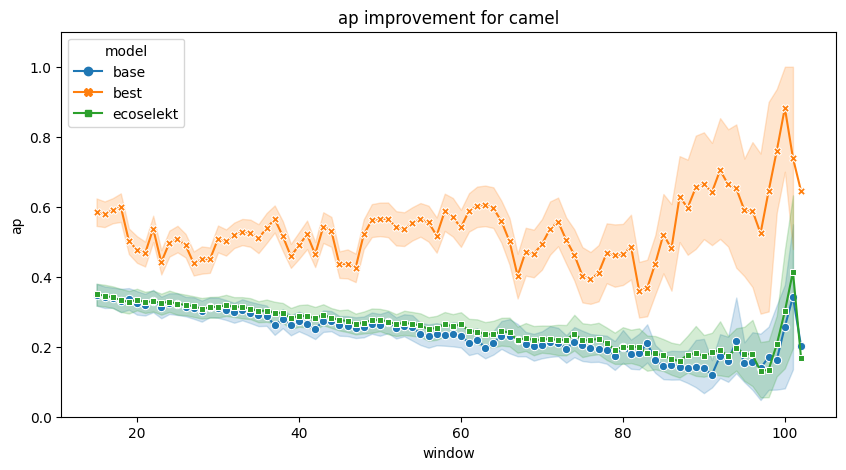

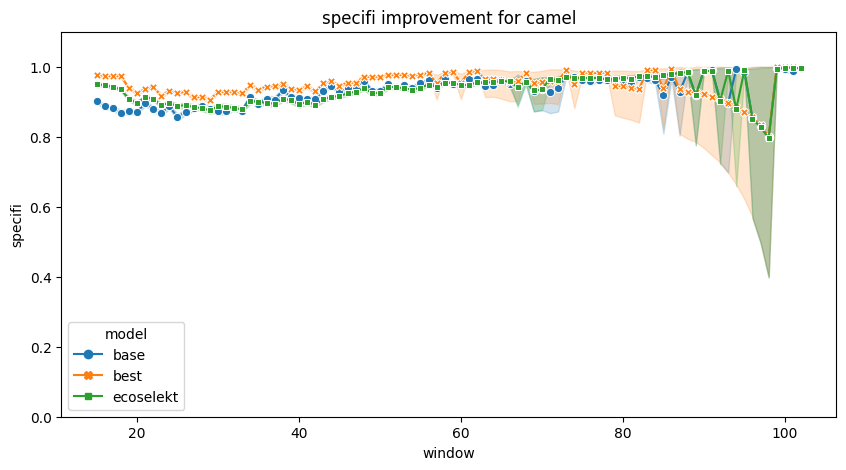

In [8]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], best_eval_df, selekt_eval_df])
# plot percetange improvement for each metric for each window
for metric in ["precision", "recall", "f1", "auc", "gmean", "ap", "specifi"]:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x="window", y=metric, data=eval_df, hue="model", markers=True, style="model", dashes=False)
    plt.title(f"{metric} improvement for {PROJECT_NAME}")
    plt.ylim(0, 1.1)
    plt.show()

In [9]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], selekt_eval_df])
eval_df = eval_df[eval_df["window"] == eval_df["test_split"] - 1]
_, p = wilcoxon(eval_df[eval_df["model"] == "ecoselekt"]["auc"], eval_df[eval_df["model"] == "base"]["auc"])
print(f"Wilcoxon test p-value: {p}")
print(f"Wilcoxon test significance: {p < ALPHA}")

Wilcoxon test p-value: 0.0020039628226153293
Wilcoxon test significance: True


In [10]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], selekt_eval_df])
eval_df = eval_df[eval_df["window"] == eval_df["test_split"] - 1]
_, p = wilcoxon(eval_df[eval_df["model"] == "ecoselekt"]["recall"], eval_df[eval_df["model"] == "base"]["recall"])
print(f"Wilcoxon test p-value: {p}")
print(f"Wilcoxon test significance: {p < ALPHA}")

Wilcoxon test p-value: 0.19602964089515507
Wilcoxon test significance: False


In [11]:
bestmodel_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_best_model_per_test_split.csv")
bestmodel_df.drop(columns=["Unnamed: 0"], inplace=True)
print(bestmodel_df.shape)
bestmodel_df.head()

(783200, 4)


commit_id  window  test_split  model_version
0  1028d4e653f256cdeba0314cfebcf7eea804bb50      15          16              3
1  cf879b3c6018dac6e6788ac9e341cbc7f85864a5      15          16              3
2  ab957f8de42f5c3cc4541b7d8b3a742642d2a3e9      15          16              3
3  df42b959da69e8312cbd0e8e6c5dbae4905f6651      15          16              3
4  36b805caf558db6050f9a613fedb80f29958d904      15          16              3

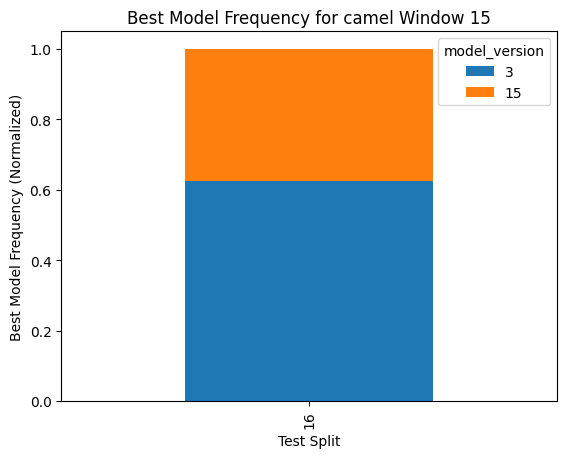

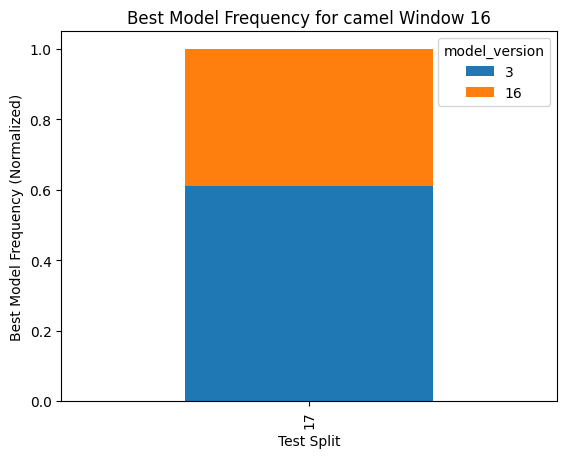

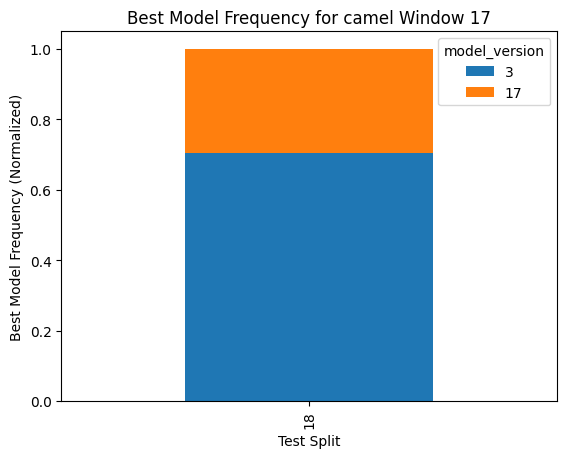

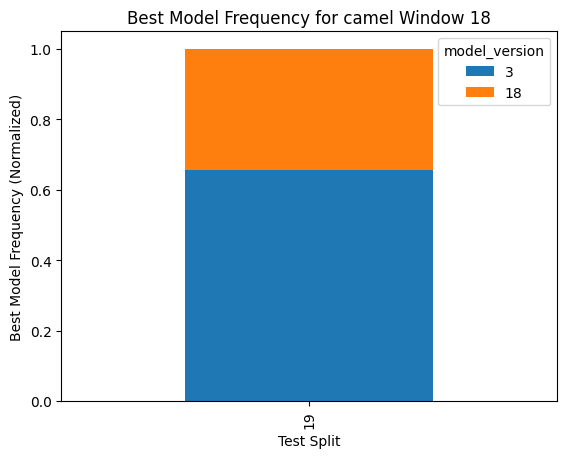

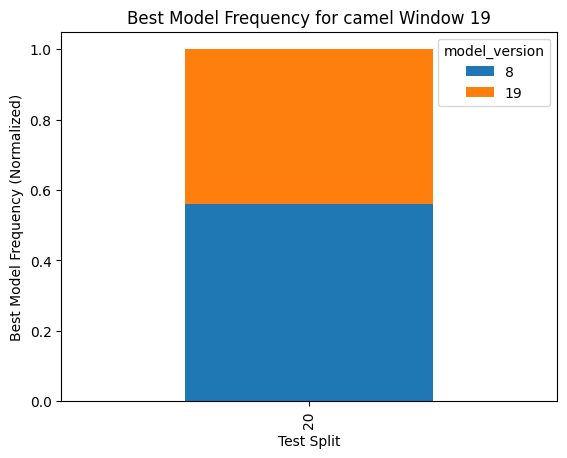

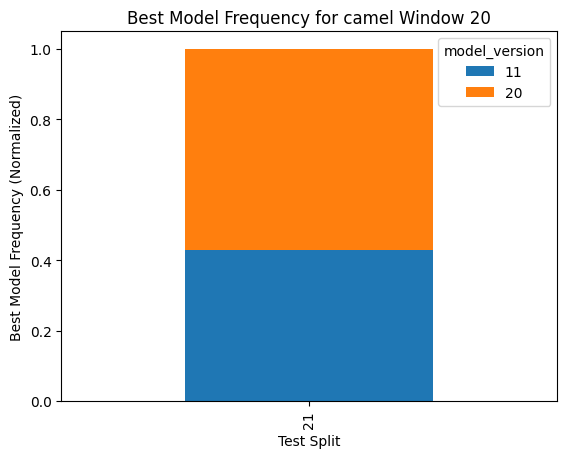

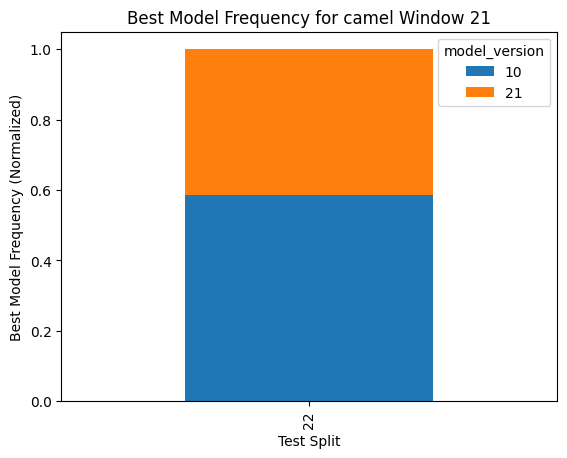

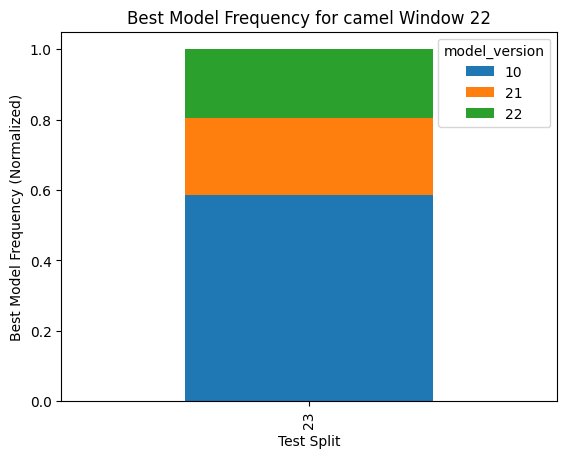

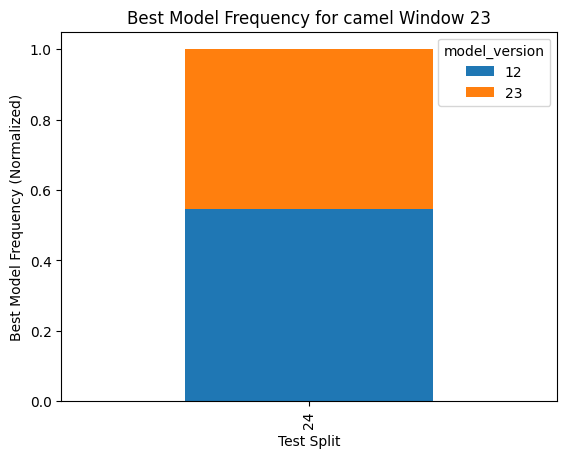

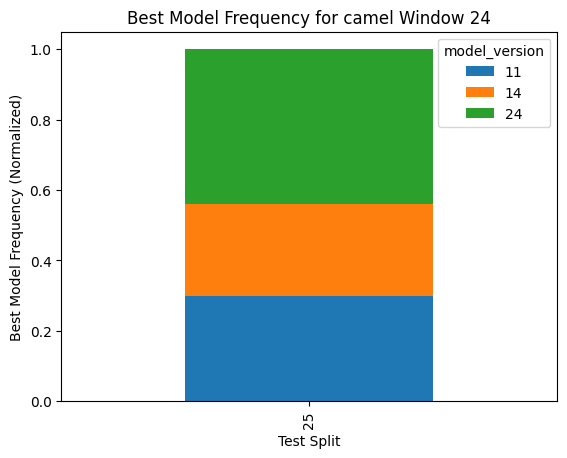

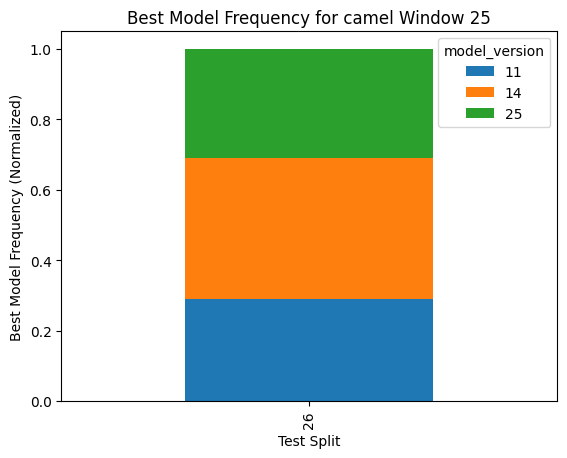

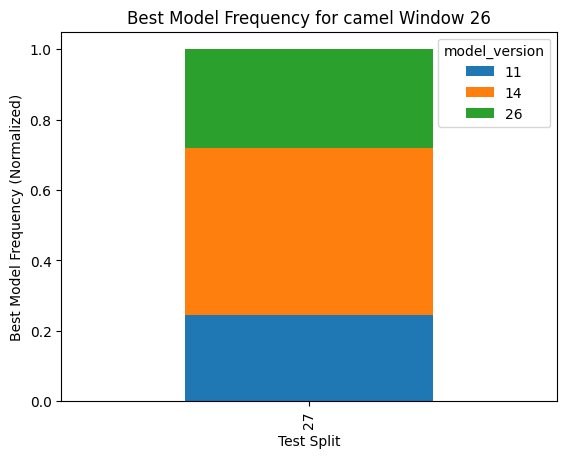

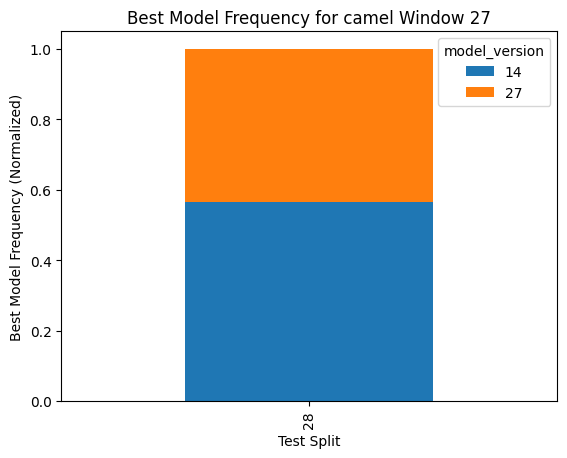

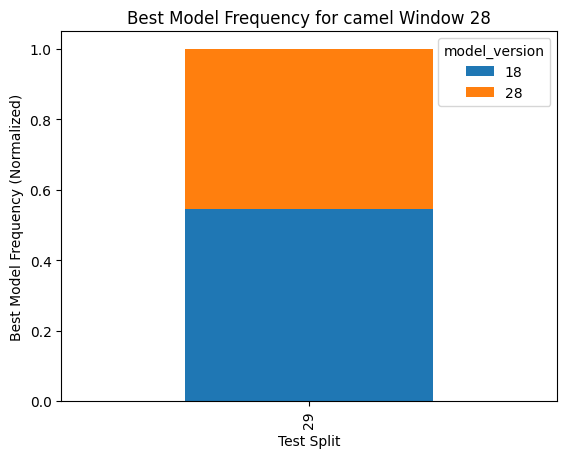

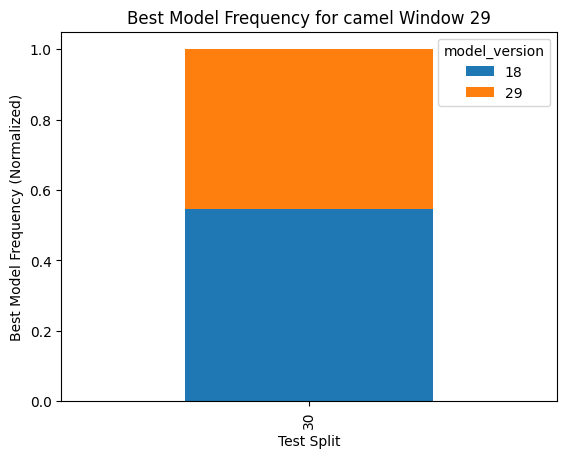

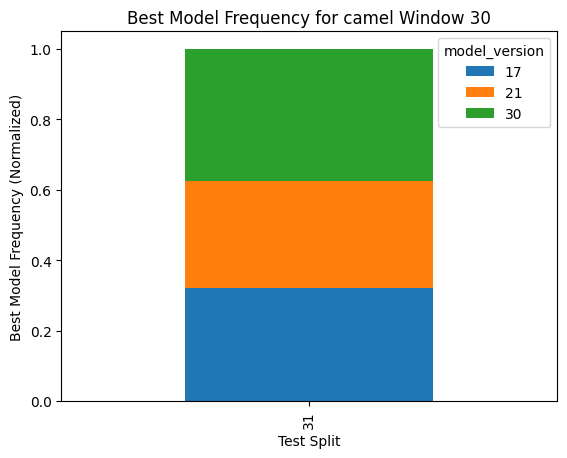

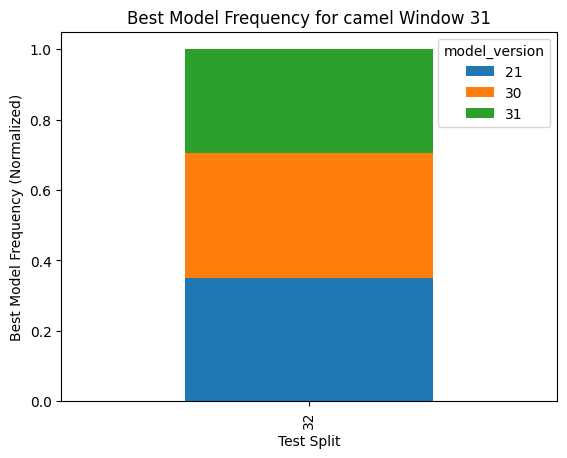

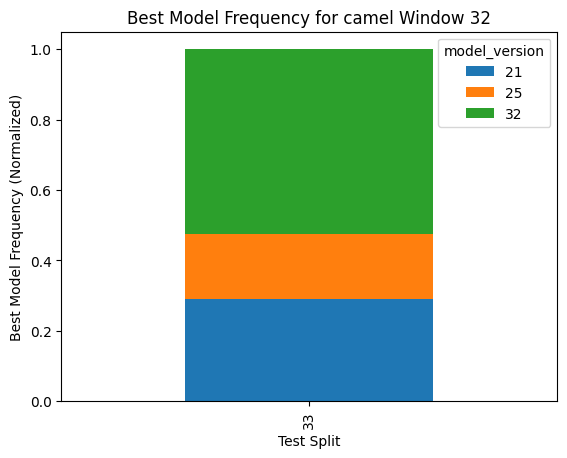

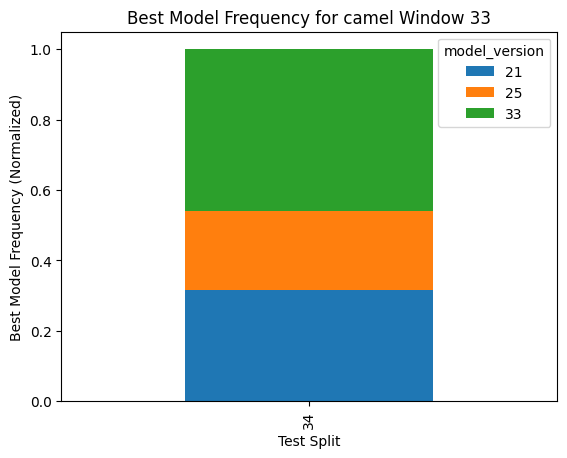

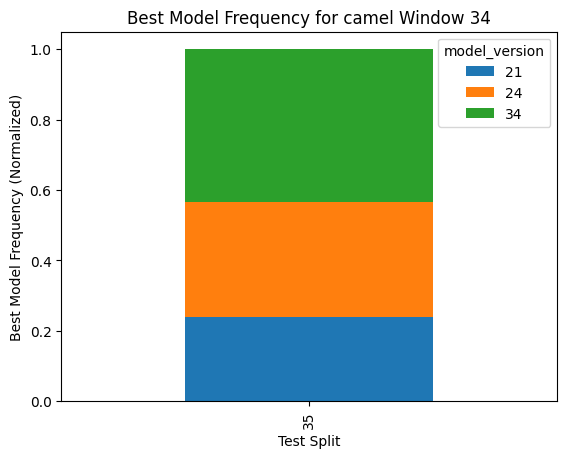

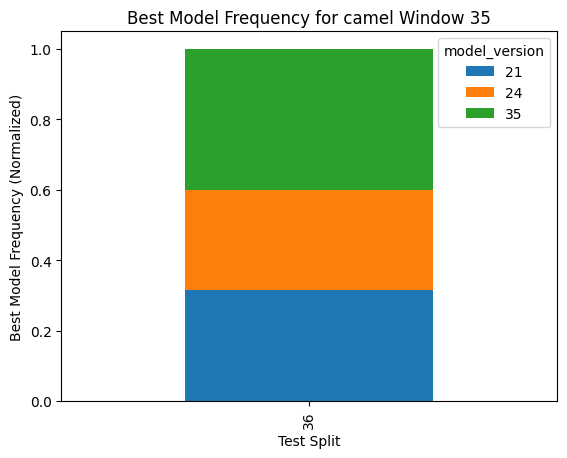

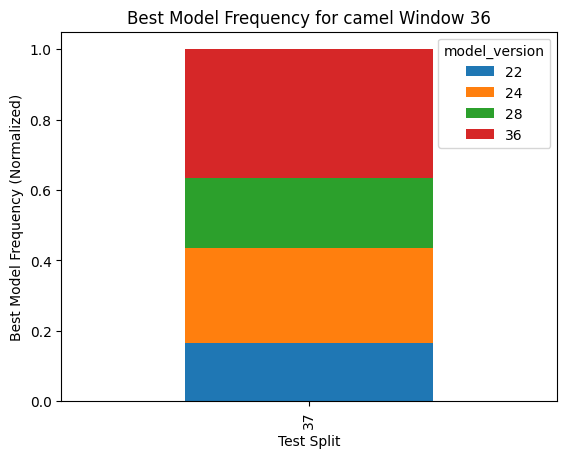

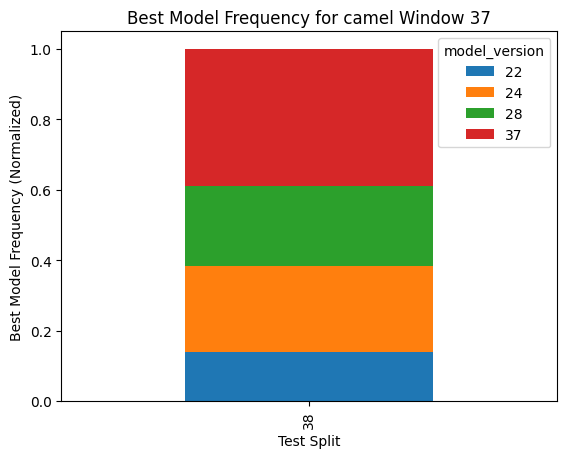

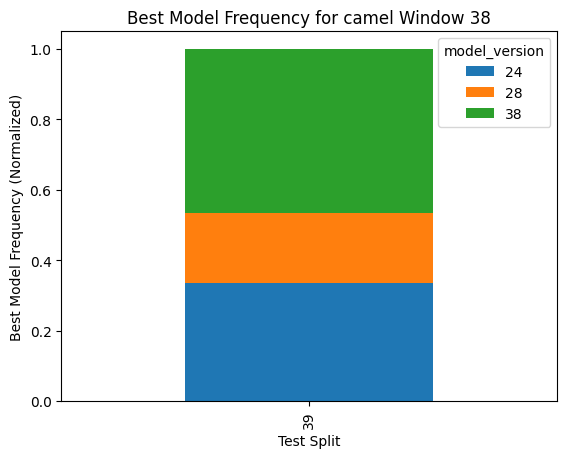

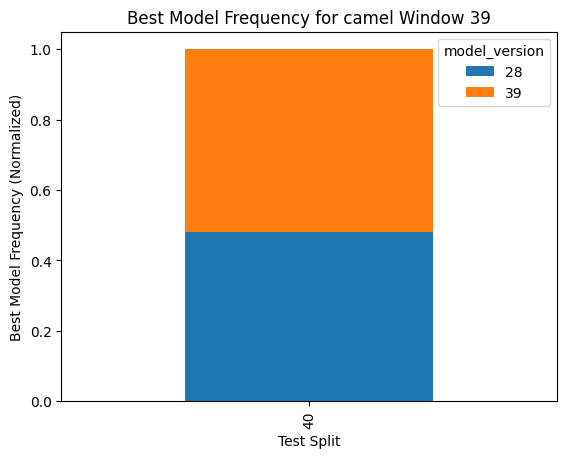

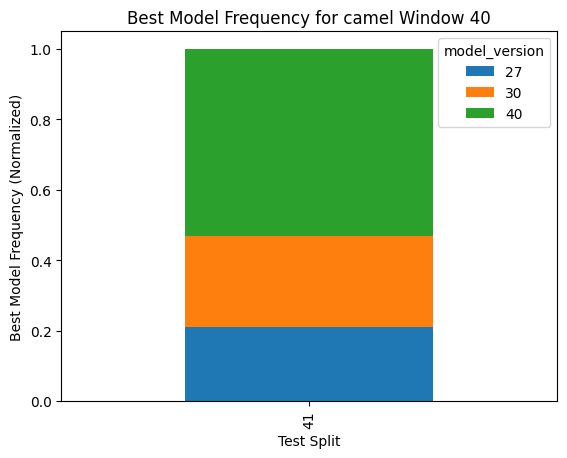

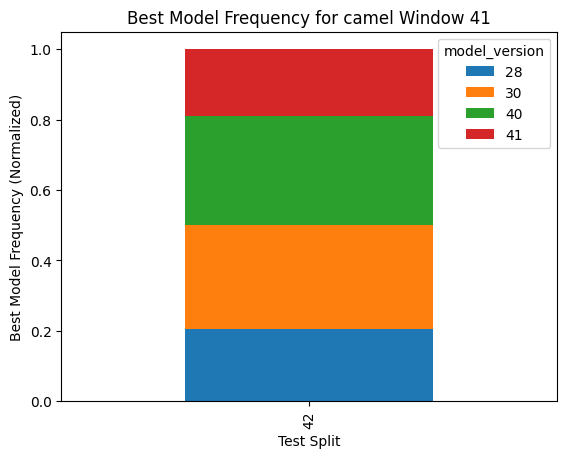

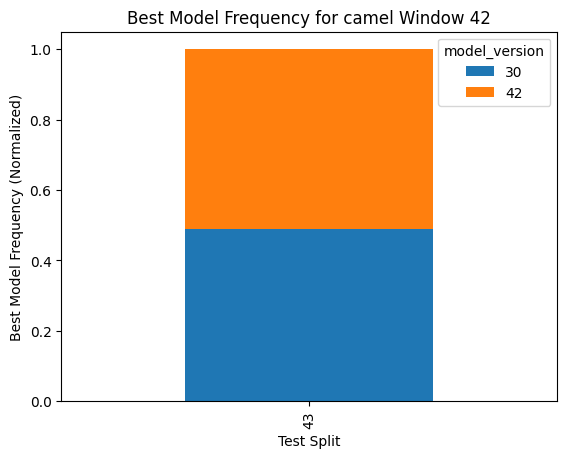

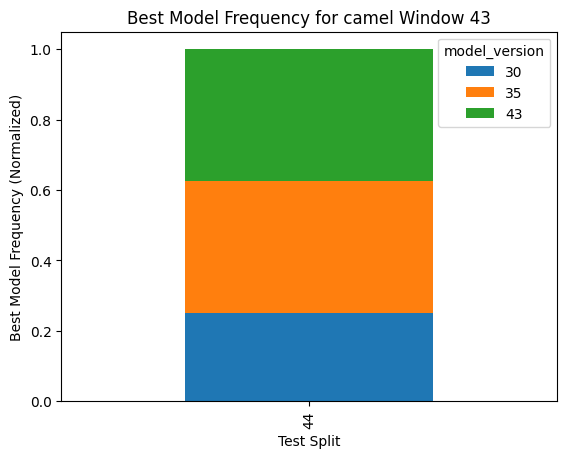

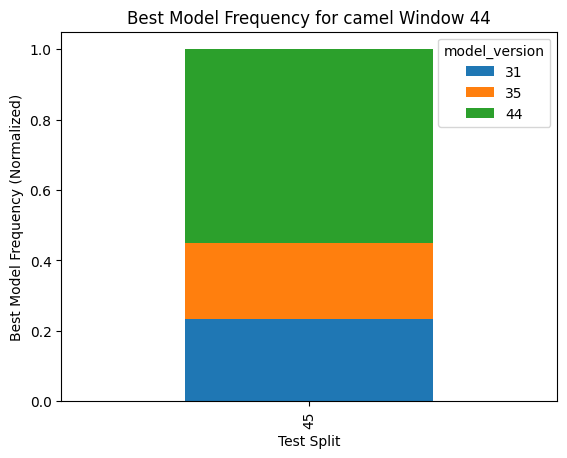

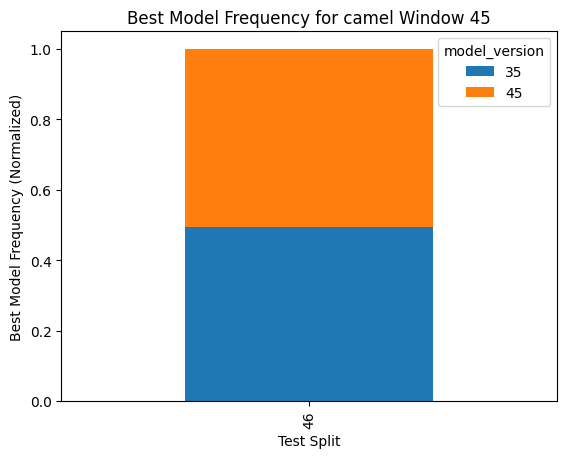

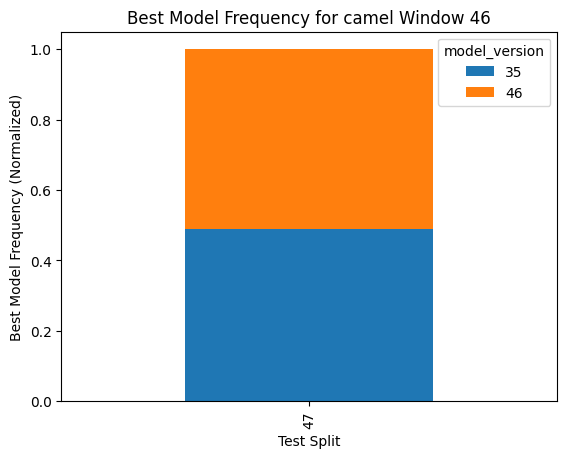

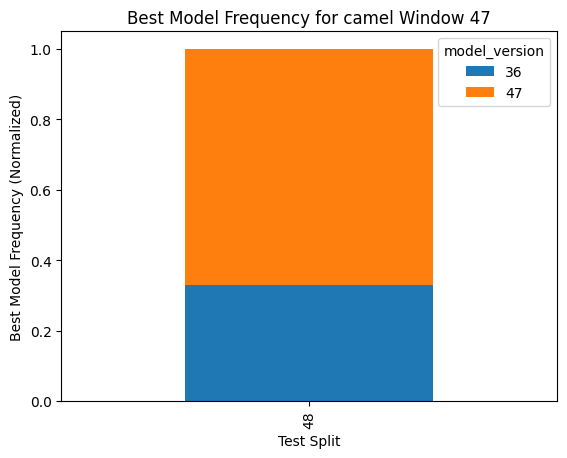

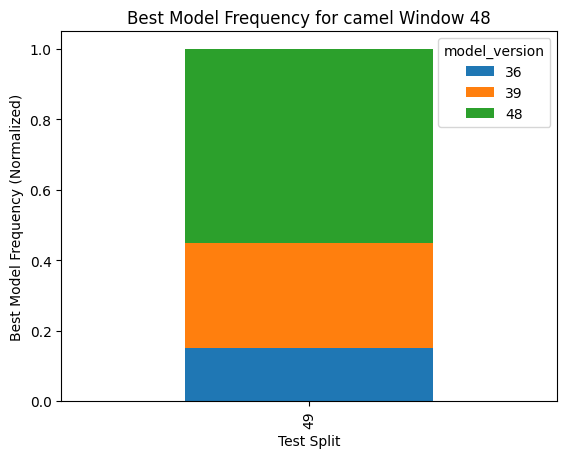

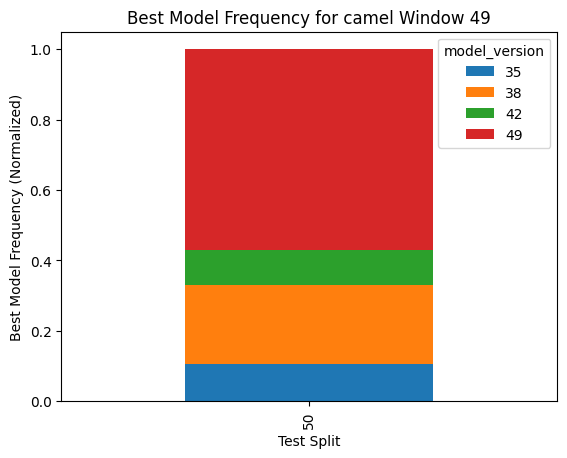

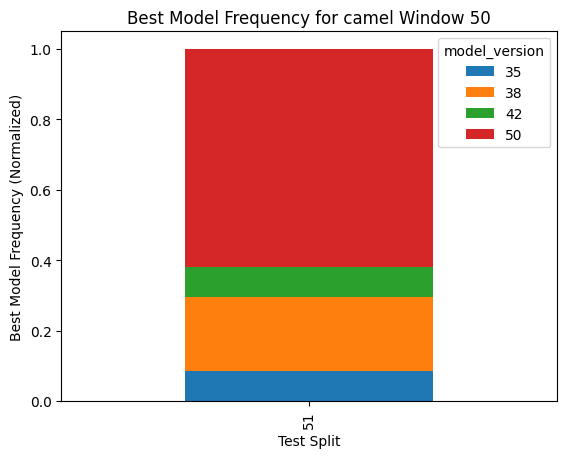

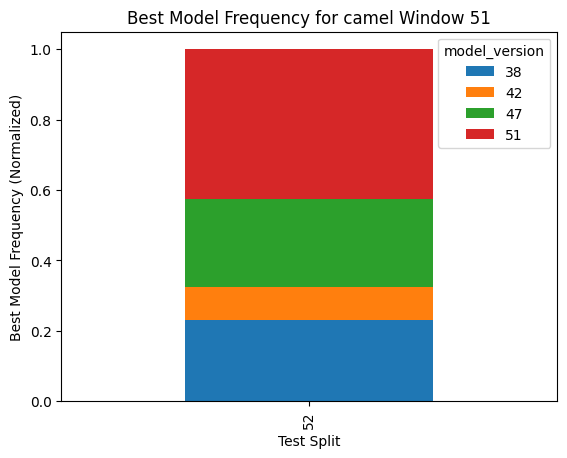

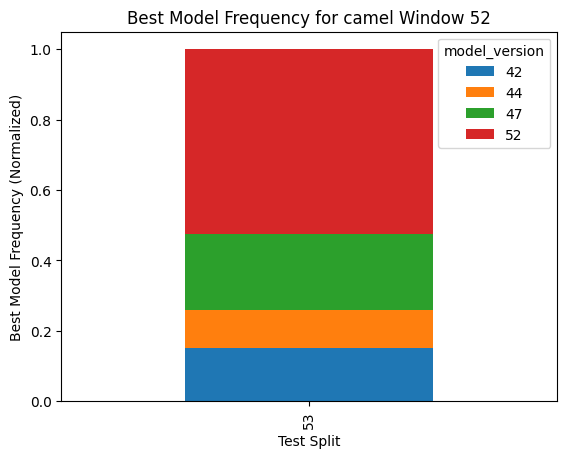

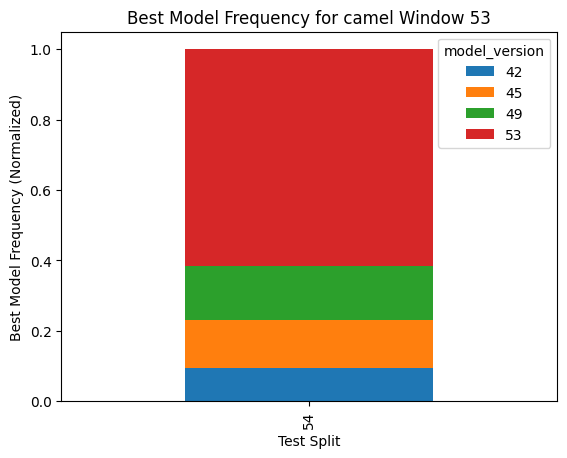

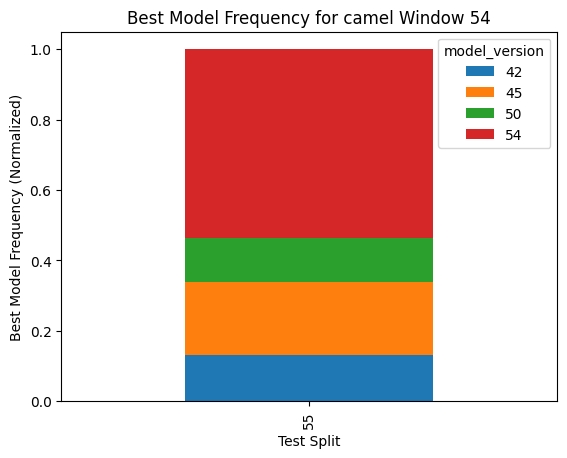

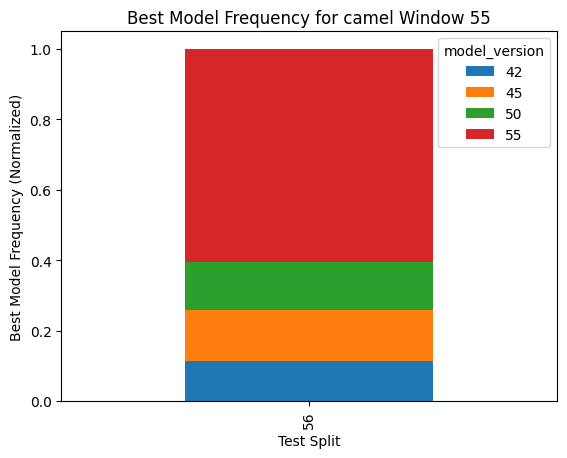

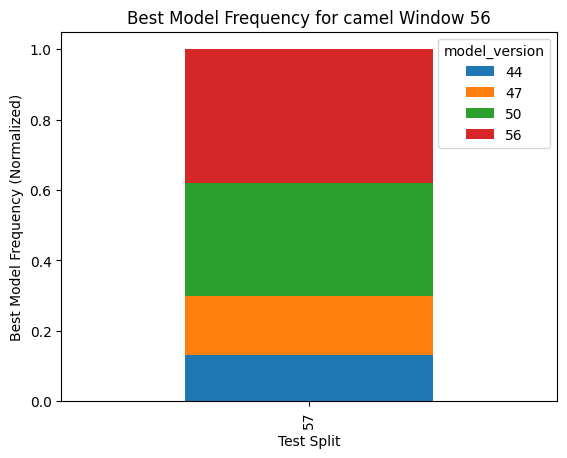

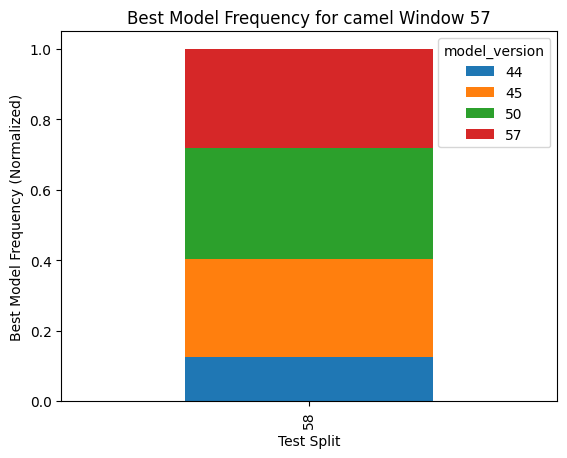

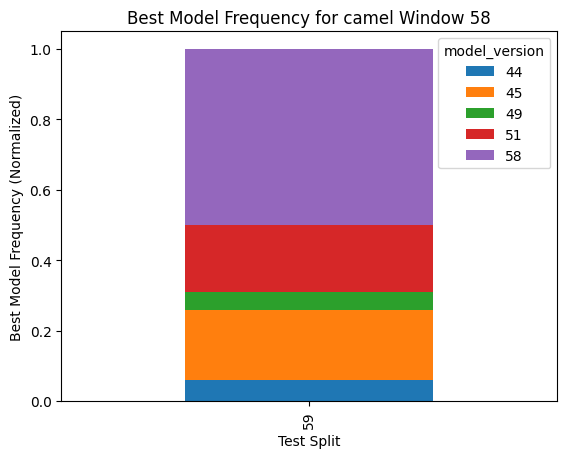

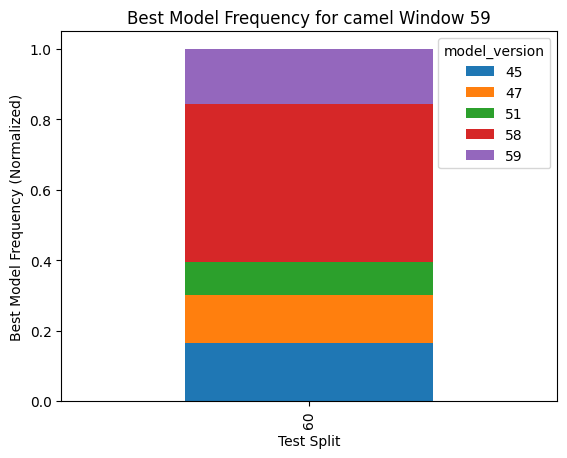

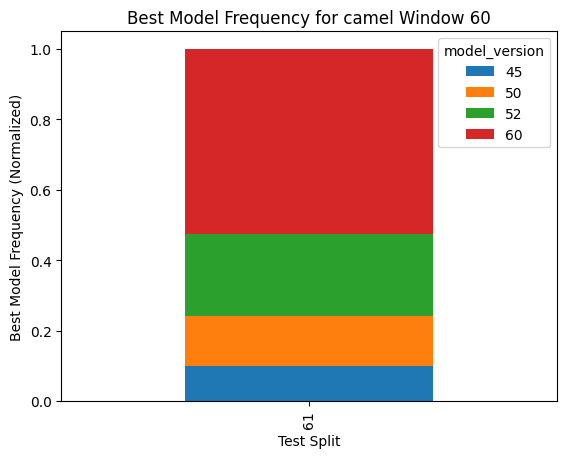

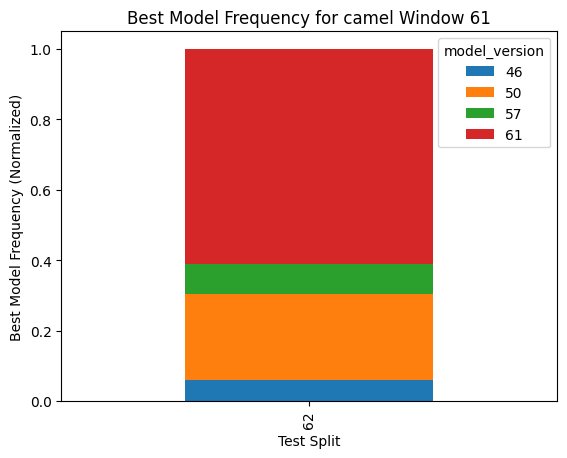

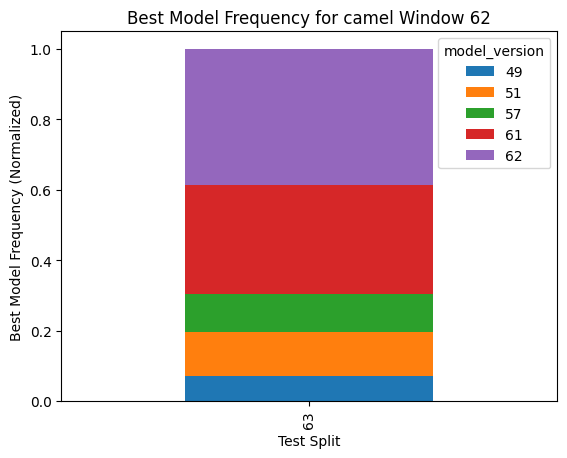

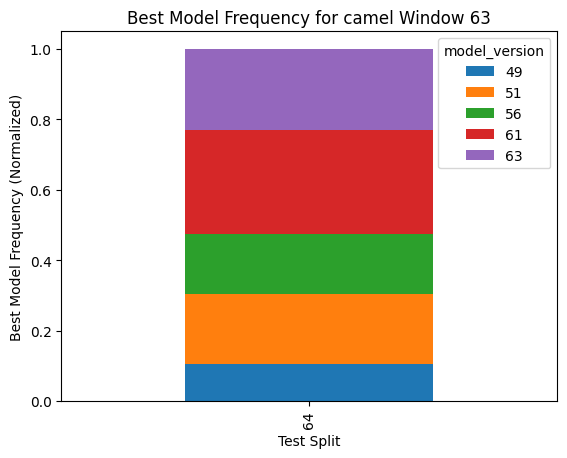

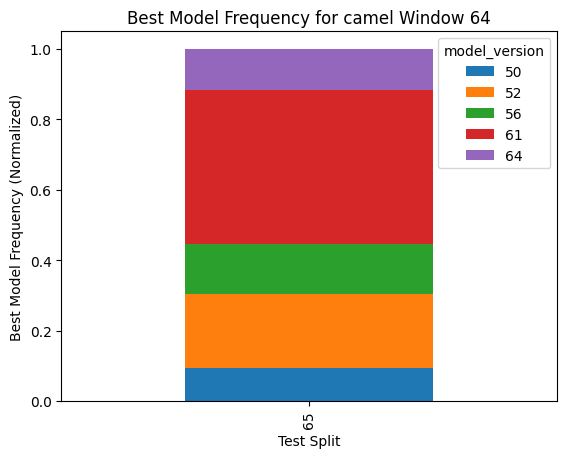

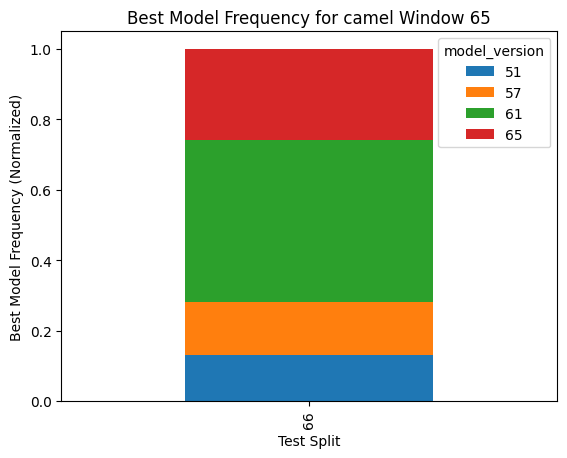

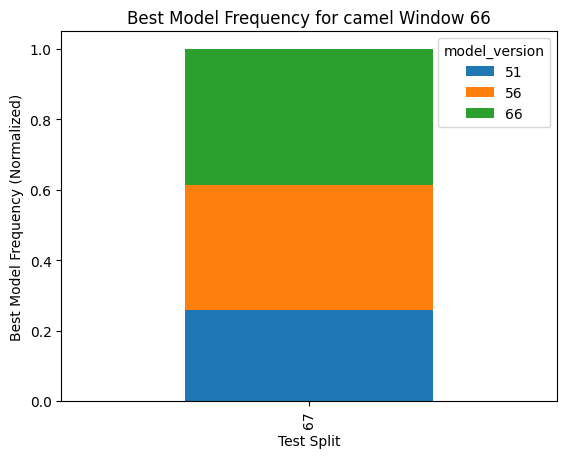

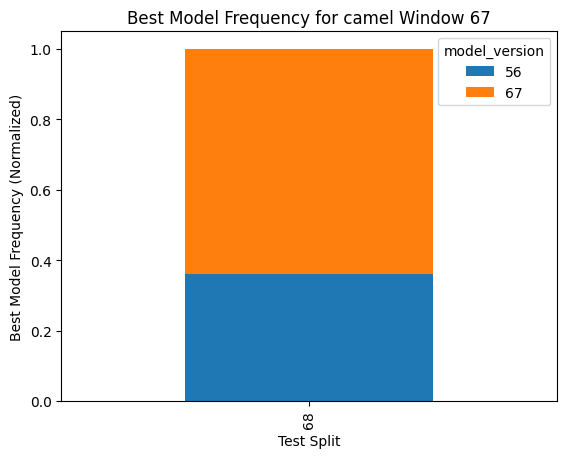

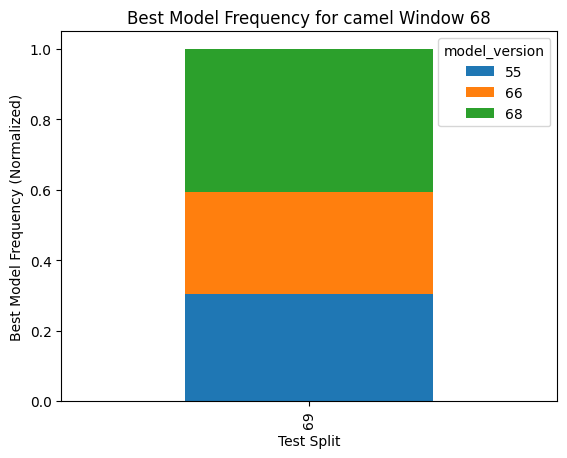

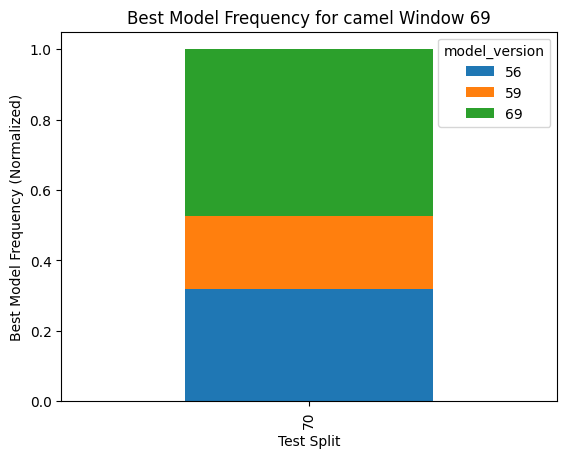

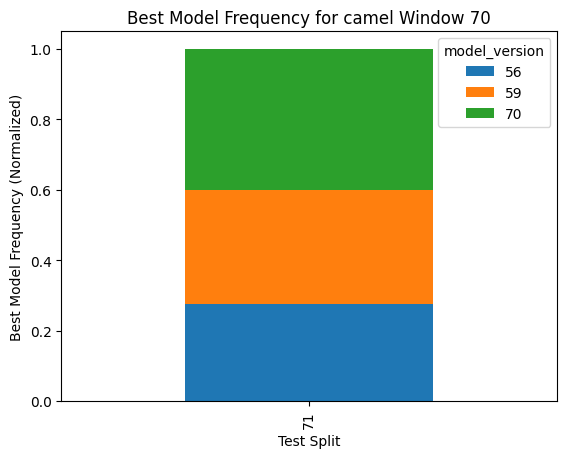

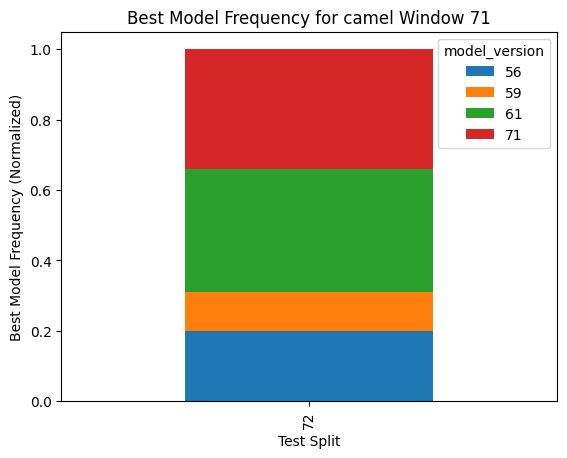

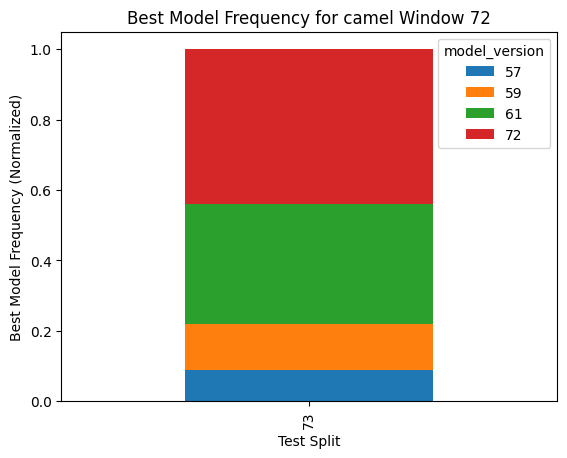

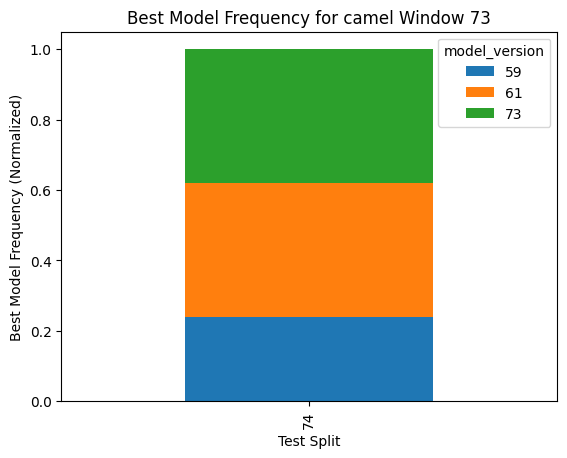

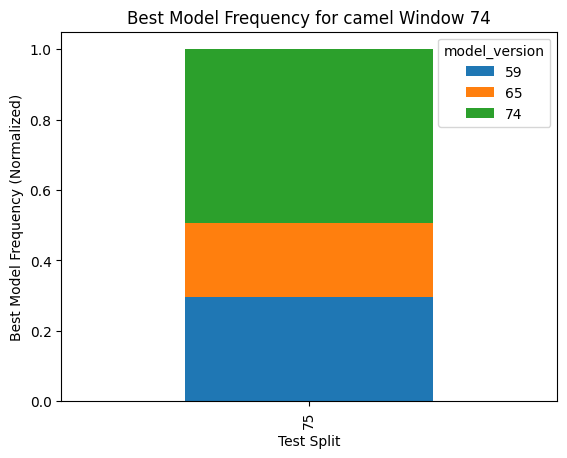

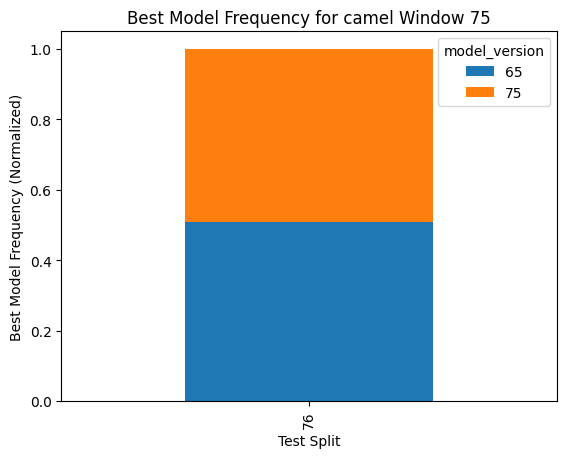

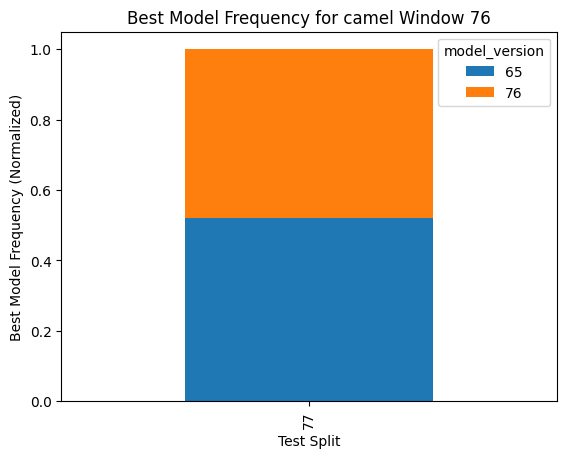

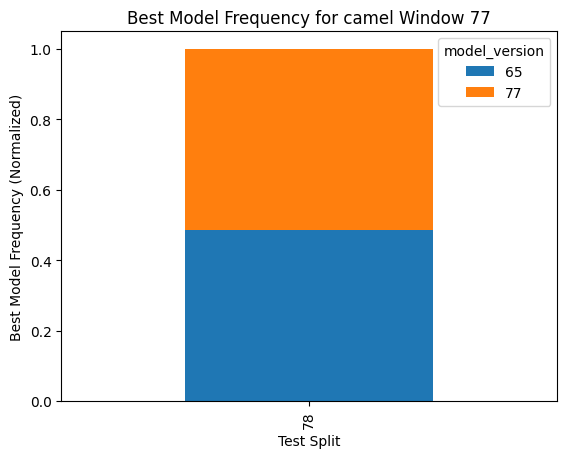

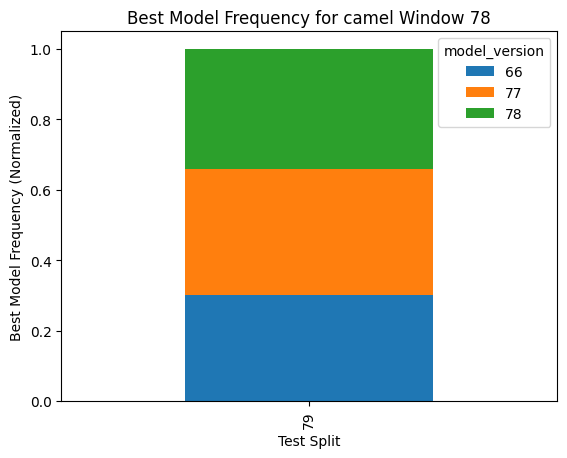

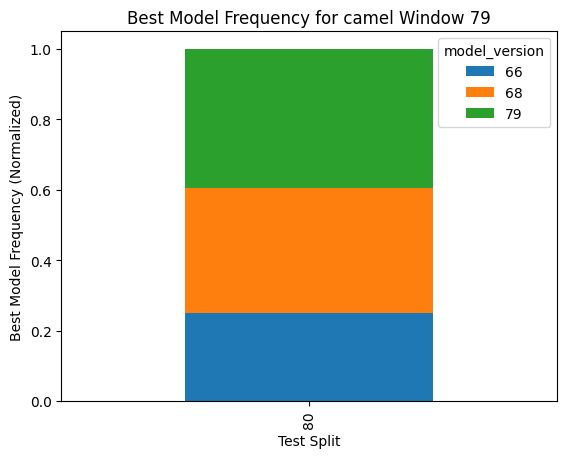

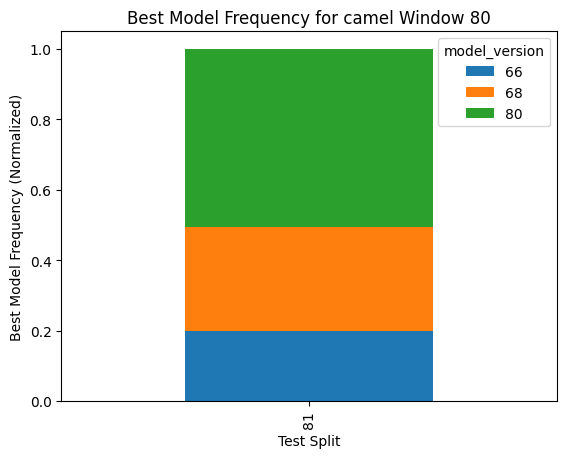

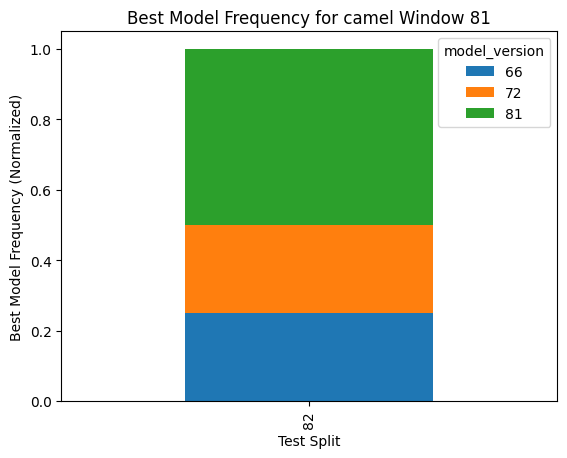

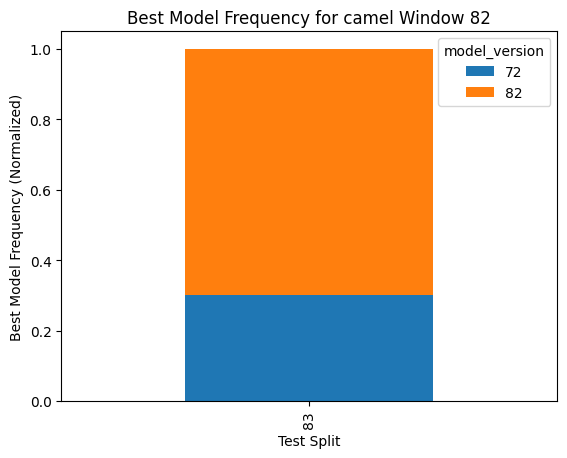

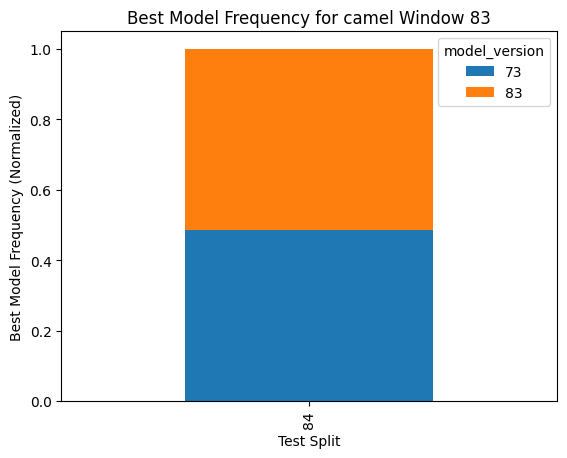

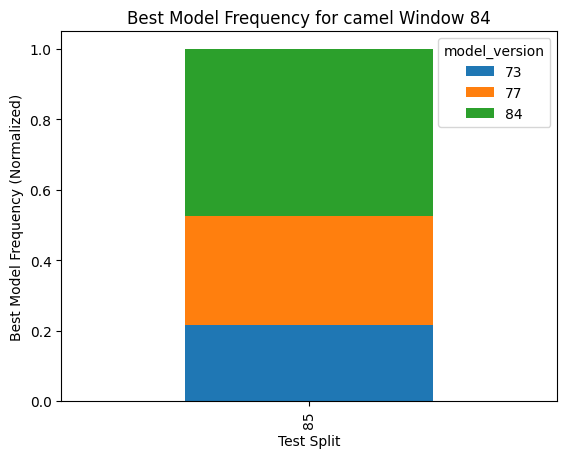

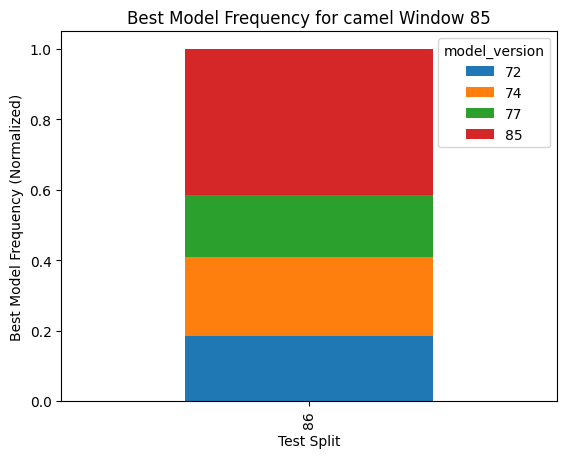

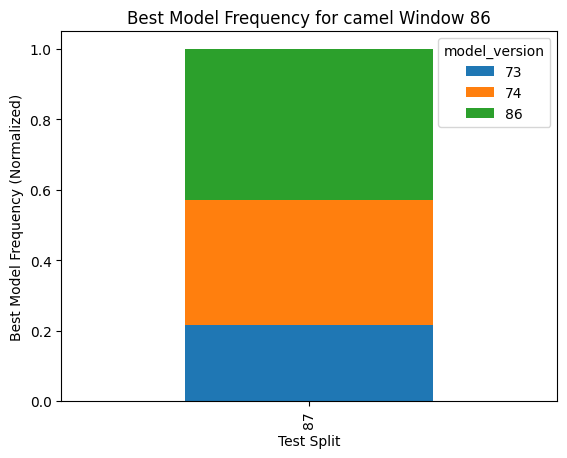

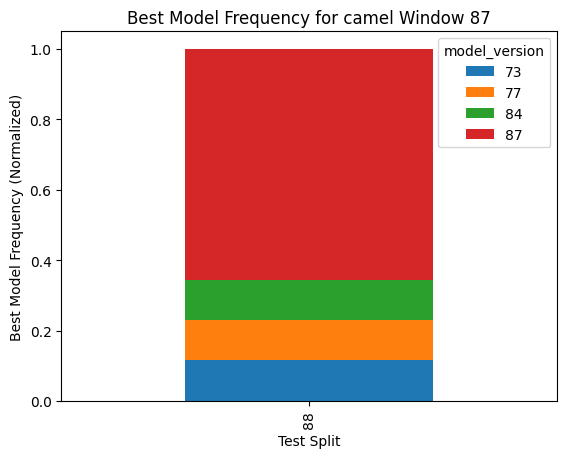

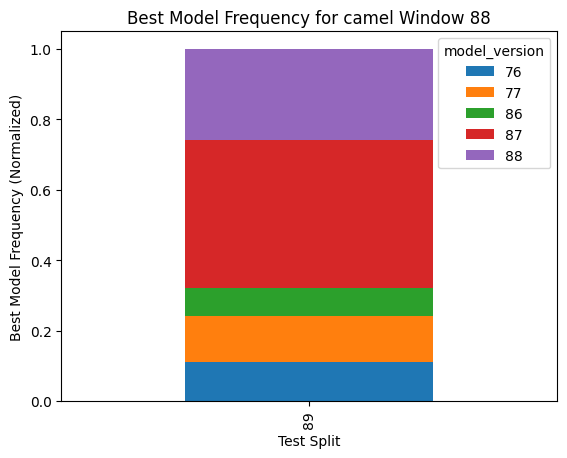

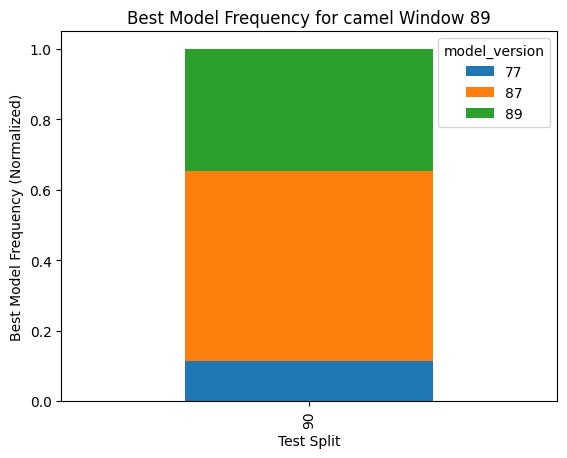

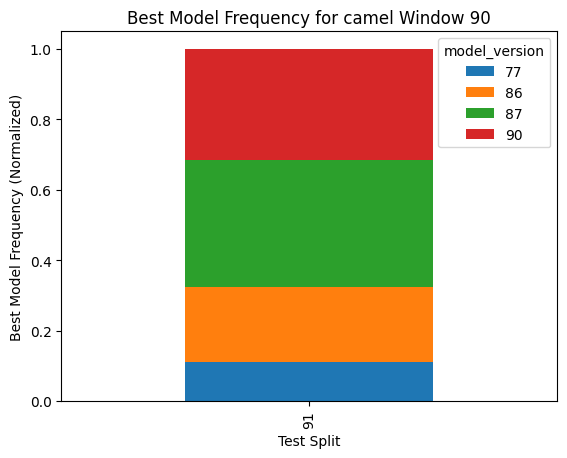

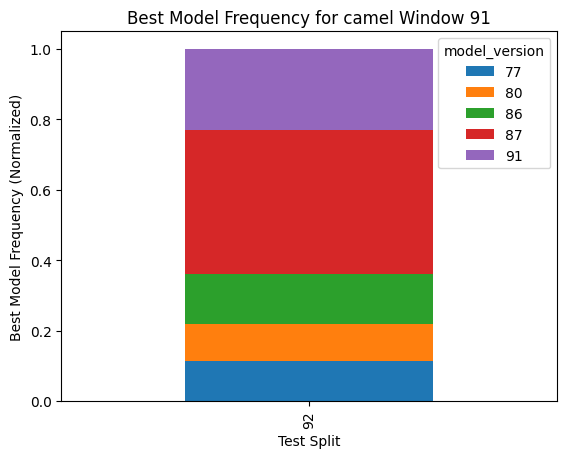

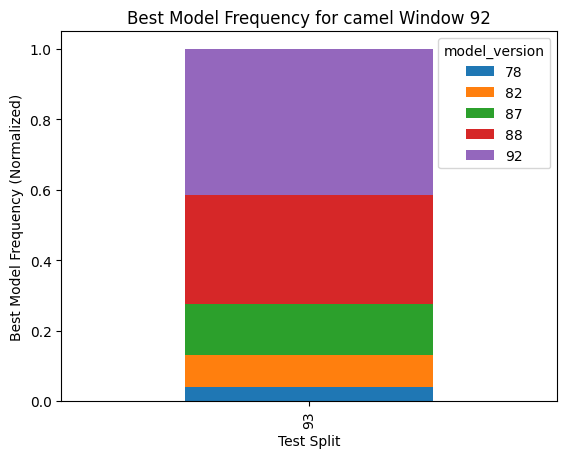

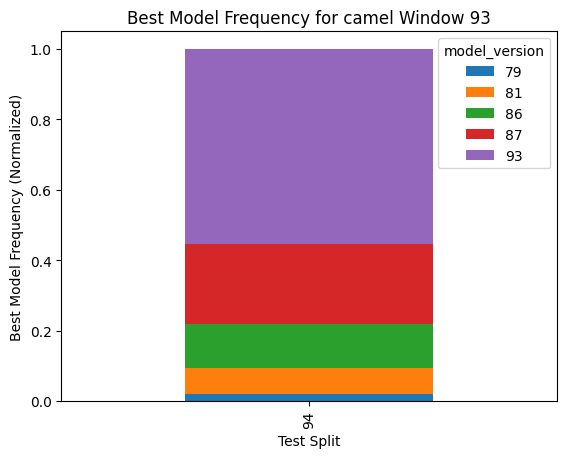

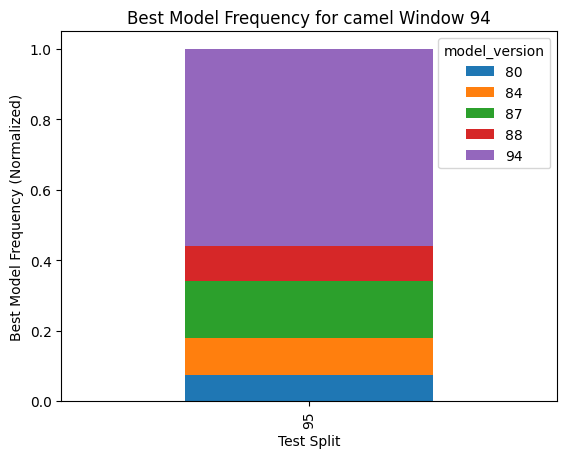

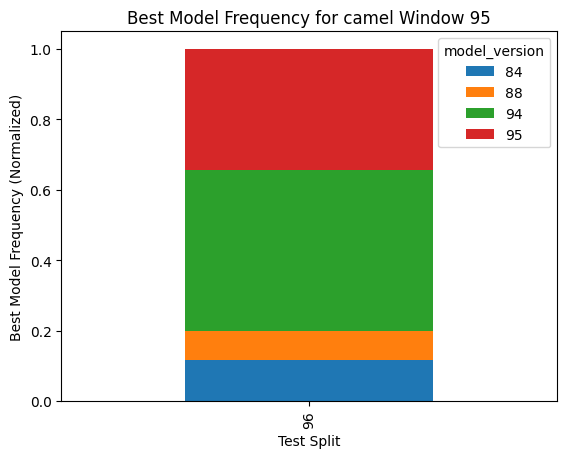

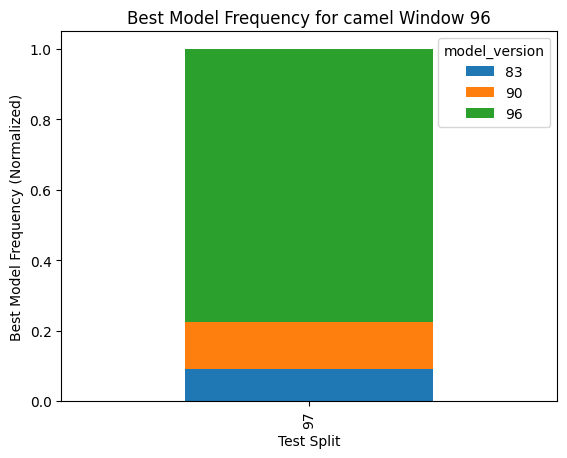

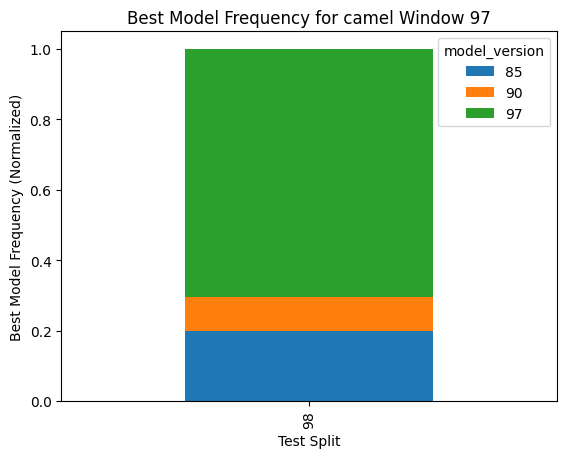

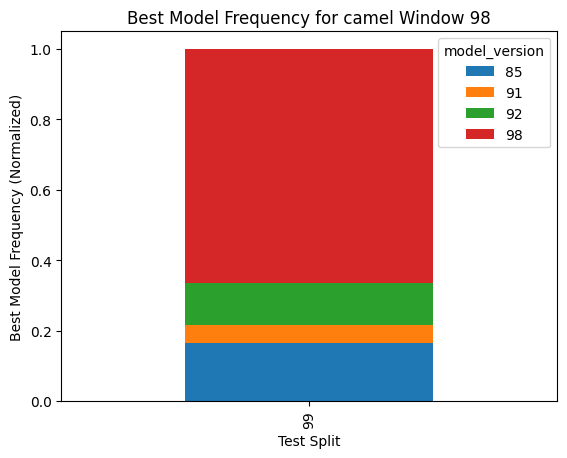

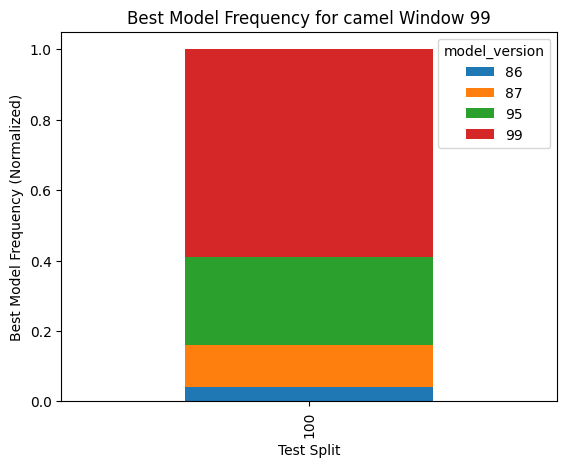

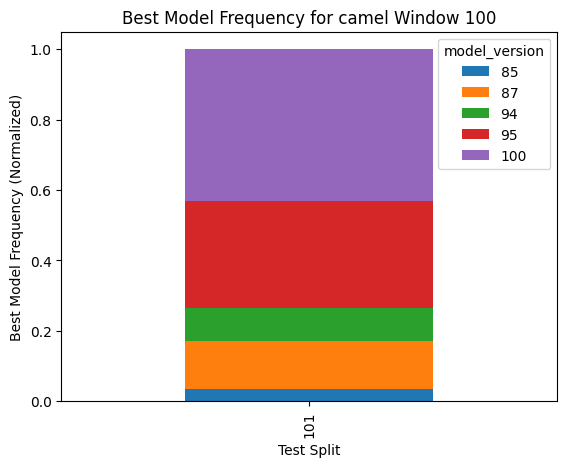

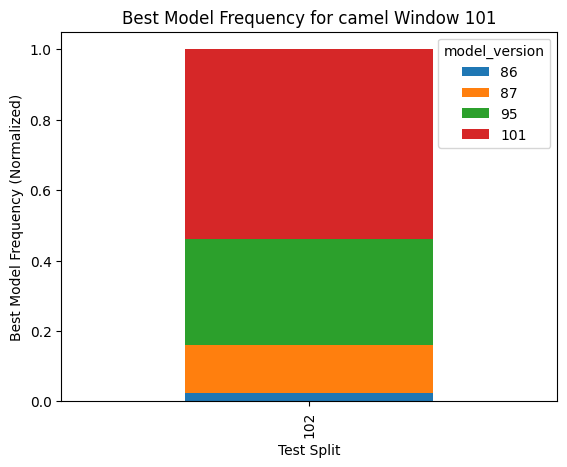

In [12]:
for i in range(MODEL_HISTORY,TOTAL_WINDOWS - 1):
    temp_bestmodel_df = bestmodel_df[bestmodel_df["window"] == i]
    temp_bestmodel_df = temp_bestmodel_df[temp_bestmodel_df["test_split"] == i + 1]

    # best model
    model_frequency_by_test_split = temp_bestmodel_df.groupby('test_split')['model_version'].value_counts().unstack().fillna(0)
    normalized_model_frequency_by_test_split = model_frequency_by_test_split.div(model_frequency_by_test_split.sum(axis=1), axis=0)
    p = normalized_model_frequency_by_test_split.plot(kind='bar', stacked=True)
    p.set_xlabel("Test Split")
    p.set_ylabel("Best Model Frequency (Normalized)")
    p.set_title(f"Best Model Frequency for {PROJECT_NAME} Window {i}")
    plt.show()